In [1]:
import csv
import json
import time
import pandas as pd
import numpy as np

import researchpy as rp

import sys  
sys.path.insert(0, 'E:\Google Drive\Analises\Codigos python')
from build_features import *
import ast

from alive_progress import alive_bar
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\livia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\livia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\livia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
path = 'C:\\Users\\livia\\Dropbox\\HRP Alliance authorship paper\\Old Data\\Data 2022-12-16\\'

authors = pd.read_csv(path + 'paper_authors_with_affiliations.csv')
len(authors.pmid.value_counts())

1484

In [5]:
authors.columns[:50]

Index(['Term', 'Title', 'Tags', 'Origin', 'pmid_l', 'title', 'authors_list',
       'citation', 'journal_book', 'publication_year', 'pmcid', 'doi',
       'publication_type', 'mesh_terms', 'term', 'is_systematic_review',
       'abstract', 'retrieved', 'deduplicated_name_std_l', 'VB check',
       'Unnamed: 20', 'Unnamed: 21', 'Inclusion', 'count_authors',
       'count_authors_institutions', 'count_authors_individual',
       'count_collaborators', 'count_collaborators_institutions',
       'count_collaborators_individual', 'count_authors_1',
       'count_authors_institutions_1', 'count_authors_individual_1', 'index',
       'full_name', 'affiliation', 'index_authorship', 'pmid',
       'is_institutions_name', 'last_name', 'first_letter_name',
       'standard_name', 'deduplicated_name_std', 'names_variation_std',
       'n_variacoes_std', 'countries', 'gender', 'constant', 'countries_name',
       'name', 'alpha-2'],
      dtype='object')

In [6]:
authors.publication_type_final.replace("z Need Classification", np.nan, inplace=True)
authors.publication_type.replace("Other", np.nan, inplace=True)
authors.last_author_affiliation.replace("unknown", np.nan, inplace=True)
authors.first_author_gender.replace("unknown", np.nan, inplace=True)
authors.last_author_gender.replace("unknown", np.nan, inplace=True)
authors.first_author_who_area.replace("z Unknown region",  np.nan, inplace=True)
authors.last_author_region.replace("z Unknown region",  np.nan, inplace=True)
authors.last_author_who_area.replace("z Unknown region",  np.nan, inplace=True)

authors.first_author_region.replace("z Unknown region",  np.nan, inplace=True)
authors.last_author_affiliation.replace("Unknown affiliation",  np.nan, inplace=True)
authors.first_author_affiliation.replace("Unknown affiliation",  np.nan, inplace=True)

authors.who_region_hrp.replace("z Unknown region",  np.nan, inplace=True)
authors.first_author_who_area_hrp.replace("z Unknown region",  np.nan, inplace=True)
authors.last_author_who_area_hrp.replace("z Unknown region",  np.nan, inplace=True)
authors.first_author_income_country.replace("z Unknown Income",  np.nan, inplace=True)
authors.last_author_income_country.replace("z Unknown Income",  np.nan, inplace=True)

authors.gender.replace("unknown",  np.nan, inplace=True)

In [7]:
tabelaEstiloArtigoCategoricas(authors,  'gender',"name", probabilidade='col').sort_values(('female', 'N'), ascending = False)

gender                                             female            male  \
distribuição                                            N         %     N   
name                                                                        
All                                                  3883  (100.0%)  3037   
Switzerland                                          1352  (34.82%)   941   
United States of America                              602   (15.5%)   312   
United Kingdom of Great Britain and Northern Ir...    358   (9.22%)   234   
Brazil                                                293   (7.55%)   268   
...                                                   ...       ...   ...   
Haiti                                                   0    (0.0%)     2   
Tunisia                                                 0    (0.0%)     1   
Papua New Guinea                                        0    (0.0%)     1   
Cuba                                                    0    (0.0%)     3   
Korea, Republic of                                      0    (0.0%)     1   

gender                                                         All            
distribuição                                               %     N         %  
name                                                                          
All                                                 (100.0%)  6920  (100.0%)  
Switzerland                                         (30.98%)  2293  (33.14%)  
United States of America                            (10.27%)   914  (13.21%)  
United Kingdom of Great Britain and Northern Ir...    (7.7%)   592   (8.55%)  
Brazil                                               (8.82%)   561   (8.11%)  
...                                                      ...   ...       ...  
Haiti                                                (0.07%)     2   (0.03%)  
Tunisia                                              (0.03%)     1   (0.01%)  
Papua New Guinea                                     (0.03%)     1   (0.01%)  
Cuba                                                  (0.1%)     3   (0.04%)  
Korea, Republic of                                   (0.03%)     1   (0.01%)  

[108 rows x 6 columns]

In [8]:
tabelaEstiloArtigoCategoricas(authors,  'type_author_2',"name", probabilidade='col')

type_author_2 co-author           collaborator           first_author  \
distribuição          N         %            N         %            N   
name                                                                    
Argentina           136   (2.79%)           22   (4.71%)           26   
Australia           129   (2.64%)            5   (1.07%)           30   
Austria               1   (0.02%)            0    (0.0%)            2   
Bahrain               1   (0.02%)            0    (0.0%)            0   
Bangladesh           33   (0.68%)            2   (0.43%)            3   
...                 ...       ...          ...       ...          ...   
Uruguay              36   (0.74%)            3   (0.64%)            7   
Viet Nam             17   (0.35%)            0    (0.0%)            5   
Zambia               27   (0.55%)            0    (0.0%)            3   
Zimbabwe             17   (0.35%)            0    (0.0%)            4   
All                4883  (100.0%)          467  (100.0%)         1273   

type_author_2           last_author             All            
distribuição          %           N         %     N         %  
name                                                           
Argentina       (2.04%)          11    (1.3%)   195   (2.61%)  
Australia       (2.36%)           8   (0.95%)   172    (2.3%)  
Austria         (0.16%)           0    (0.0%)     3   (0.04%)  
Bahrain          (0.0%)           0    (0.0%)     1   (0.01%)  
Bangladesh      (0.24%)           2   (0.24%)    40   (0.54%)  
...                 ...         ...       ...   ...       ...  
Uruguay         (0.55%)           1   (0.12%)    47   (0.63%)  
Viet Nam        (0.39%)           0    (0.0%)    22   (0.29%)  
Zambia          (0.24%)           0    (0.0%)    30    (0.4%)  
Zimbabwe        (0.31%)           0    (0.0%)    21   (0.28%)  
All            (100.0%)         846  (100.0%)  7469  (100.0%)  

[116 rows x 10 columns]

In [9]:
tabelaEstiloArtigoCategoricas(authors, "gender", 'type_author_2', probabilidade='col')

gender        female            male              All          
distribuição       N         %     N         %      N         %
type_author_2                                                  
co-author       3728  (56.03%)  3174  (53.64%)   6902  (54.91%)
collaborator    1563  (23.49%)  1464  (24.74%)   3027  (24.08%)
first_author     744  (11.18%)   563   (9.51%)   1307   (10.4%)
last_author      618   (9.29%)   716   (12.1%)   1334  (10.61%)
All             6653  (100.0%)  5917  (100.0%)  12570  (100.0%)

In [10]:
tabelaEstiloArtigoCategoricas(authors, "gender", 'Income group', probabilidade='col')

gender              female            male             All          
distribuição             N         %     N         %     N         %
Income group                                                        
High income           2905  (74.81%)  1899  (62.53%)  4804  (69.42%)
Low income              69   (1.78%)   140   (4.61%)   209   (3.02%)
Lower middle income    272    (7.0%)   378  (12.45%)   650   (9.39%)
Upper middle income    637   (16.4%)   620  (20.41%)  1257  (18.16%)
All                   3883  (100.0%)  3037  (100.0%)  6920  (100.0%)

In [11]:
tabelaEstiloArtigoCategoricas(authors, 'type_author_2', "gender", probabilidade='col')[["first_author", "last_author", "co-author", "collaborator", "All"]]

type_author_2 first_author           last_author           co-author  \
distribuição             N         %           N         %         N   
gender                                                                 
female                 744  (56.92%)         618  (46.33%)      3728   
male                   563  (43.08%)         716  (53.67%)      3174   
All                   1307  (100.0%)        1334  (100.0%)      6902   

type_author_2           collaborator              All            
distribuição          %            N         %      N         %  
gender                                                           
female         (54.01%)         1563  (51.64%)   6653  (52.93%)  
male           (45.99%)         1464  (48.36%)   5917  (47.07%)  
All            (100.0%)         3027  (100.0%)  12570  (100.0%)

In [12]:
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income', "All"]#,'z Unknown Income']
publication_type_order = ['Prirmary data', 'Secondary data', 'Descripitve/Opinions/Methods', "All"]#, 'Other']
who_region_hrp_order = ["HRP","AFRO","AMRO","EMRO","EURO","SEARO","WPRO", "All"]#, "z Unknown region"]
who_region_order = ["AFRO","AMRO","EMRO","EURO","SEARO","WPRO", "All"]#, "z Unknown region"]


In [13]:
tabelaEstiloArtigoCategoricas(authors, 'type_author_2', 'Income group', probabilidade='col').loc[income_order][["first_author", "last_author", "co-author", "collaborator", "All"]]

type_author_2       first_author           last_author           co-author  \
distribuição                   N         %           N         %         N   
Income group                                                                 
High income                  949  (74.55%)         698  (82.51%)      3125   
Upper middle income          234  (18.38%)         108  (12.77%)       962   
Lower middle income           75   (5.89%)          31   (3.66%)       610   
Low income                    15   (1.18%)           9   (1.06%)       186   
All                         1273  (100.0%)         846  (100.0%)      4883   

type_author_2                 collaborator             All            
distribuição                %            N         %     N         %  
Income group                                                          
High income           (64.0%)          258  (55.25%)  5030  (67.35%)  
Upper middle income   (19.7%)          124  (26.55%)  1428  (19.12%)  
Lower middle income  (12.49%)           53  (11.35%)   769   (10.3%)  
Low income            (3.81%)           32   (6.85%)   242   (3.24%)  
All                  (100.0%)          467  (100.0%)  7469  (100.0%)

In [14]:
#first_authors = authors[authors.index_authorship <= 1]
first_authors = authors[authors.index_authorship > 0]
first_authors.sort_values("index_authorship", inplace=True)
first_authors = first_authors.drop_duplicates("pmid")

first_authors.head(2)

first_authors.index_authorship.value_counts()

index_authorship
1    1473
2       5
Name: count, dtype: int64

In [15]:
first_authors["female_propotion_authors"] = first_authors["total_female_authors"]/(first_authors["total_male_authors"] + first_authors["total_female_authors"])
first_authors["male_propotion_authors"] = first_authors["total_male_authors"]/(first_authors["total_male_authors"] + first_authors["total_female_authors"])

In [16]:
first_authors.columns[50:100]

Index(['alpha-3', 'country-code', 'iso_3166-2', 'region', 'sub-region',
       'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code', 'country', 'country_name', 'who_area',
       'Unnamed: 2', 'iso3', 'Country', 'Income group', 'Region',
       'type_author', 'year_of_publication', 'affiliation_name',
       'affiliation_hrp', 'affiliation_hrp_binary', 'affiliation_hrp_alt',
       'countries_name_hrp', 'who_region_hrp', 'is_first_author',
       'is_last_author', 'first_author_affiliation',
       'first_author_affiliation_alt', 'first_author_affiliation_binary',
       'last_author_affiliation', 'fisrt_author_gender', 'last_author_gender',
       'first_author_country', 'last_author_country', 'first_author_region',
       'last_author_region', 'first_author_sub_region',
       'first_author_who_area', 'first_author_who_area_hrp',
       'last_author_sub_region', 'last_author_who_area',
       'last_author_who_area_hrp', 'first_author_income_count

In [17]:
first_authors["last_author_gender"]

0         male
2145      male
2144    female
2142      male
2141    female
         ...  
2483       NaN
7983      male
2486      male
2484       NaN
7457      male
Name: last_author_gender, Length: 1478, dtype: object

In [18]:
first_authors["female_propotion_authors"]

0       0.000000
2145    0.333333
2144    0.666667
2142    0.600000
2141    0.800000
          ...   
2483    0.500000
7983    0.471795
2486    0.400000
2484    0.444444
7457    0.260870
Name: female_propotion_authors, Length: 1478, dtype: float64

<Axes: xlabel='last_author_gender', ylabel='female_propotion_authors'>

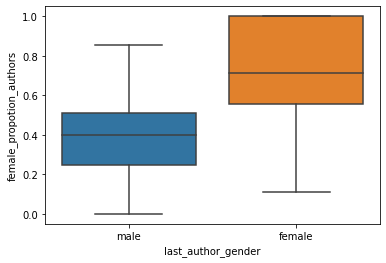

In [19]:
sns.boxplot(x="last_author_gender", y="female_propotion_authors", data=first_authors)

In [20]:
first_authors.female_propotion_authors.describe()
first_authors[["female_propotion_authors", 'last_author_gender']].groupby('last_author_gender').describe().round(3)#.unstack(1)

female_propotion_authors                              \
                                      count   mean    std    min    25%   
last_author_gender                                                        
female                                618.0  0.717  0.217  0.111  0.556   
male                                  716.0  0.377  0.227  0.000  0.250   

                                         
                      50%    75%    max  
last_author_gender                       
female              0.714  1.000  1.000  
male                0.400  0.511  0.857

<Axes: ylabel='Frequency'>

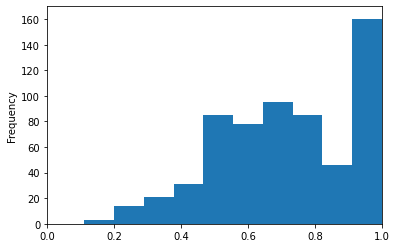

In [21]:
first_authors[first_authors.last_author_gender == "female" ].female_propotion_authors.plot.hist(xlim=(0, 1),ylim=(0,170))

<Axes: ylabel='Frequency'>

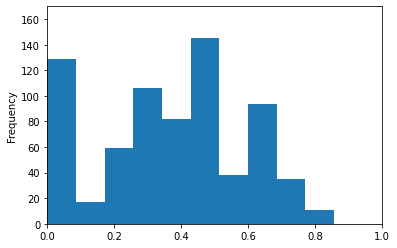

In [22]:
first_authors[first_authors.last_author_gender == "male" ].female_propotion_authors.plot.hist(xlim=(0, 1), ylim=(0,170))

<Axes: xlabel='total_female_authors', ylabel='last_author_gender'>

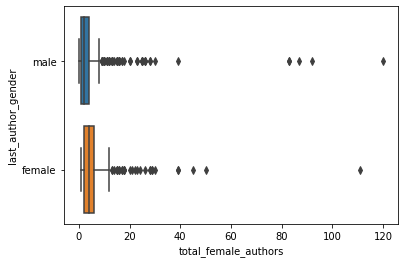

In [23]:
sns.boxplot(x="total_female_authors", y="last_author_gender", data=first_authors)

<Axes: xlabel='total_male_authors', ylabel='last_author_gender'>

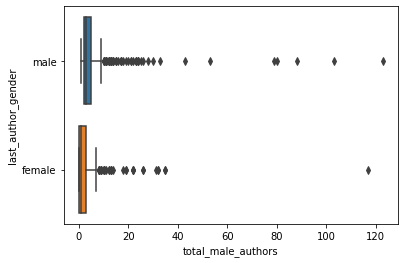

In [24]:
sns.boxplot(x="total_male_authors", y="last_author_gender", data=first_authors)

In [25]:
first_authors[["last_author_gender","female_propotion_authors"]]

,last_author_gender,female_propotion_authors
0,male,0.000000
2145,male,0.333333
2144,female,0.666667
2142,male,0.600000
2141,female,0.800000
...,...,...
2483,NaN,0.500000
7983,male,0.471795
2486,male,0.400000
2484,NaN,0.444444


In [26]:
len(first_authors[first_authors.affiliation_hrp_binary == "HRP"])

297

In [27]:
first_authors['index_authorship'].value_counts()

index_authorship
1    1473
2       5
Name: count, dtype: int64

In [28]:
first_authors["last_author_affiliation"].astype('category').cat.categories

Index(['HRP', 'Non-HRP'], dtype='object')

In [29]:
tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', "last_author_affiliation", 
                              probabilidade='col')

first_author_affiliation  HRP           Non-HRP            All          
distribuição                N         %       N         %    N         %
last_author_affiliation                                                 
HRP                       127  (70.95%)     271  (38.01%)  398  (44.62%)
Non-HRP                    52  (29.05%)     442  (61.99%)  494  (55.38%)
All                       179  (100.0%)     713  (100.0%)  892  (100.0%)

In [30]:
tabelaEstiloArtigoCategoricas(first_authors, 'first_author_gender', "first_author_income_country", 
                              probabilidade='col').loc[income_order]

first_author_gender         female           male             All          
distribuição                     N         %    N         %     N         %
first_author_income_country                                                
High income                    549  (82.19%)  330  (70.36%)   879  (77.31%)
Upper middle income             91  (13.62%)   89  (18.98%)   180  (15.83%)
Lower middle income             25   (3.74%)   38    (8.1%)    63   (5.54%)
Low income                       3   (0.45%)   12   (2.56%)    15   (1.32%)
All                            668  (100.0%)  469  (100.0%)  1137  (100.0%)

In [31]:
first_authors.publication_type_final.replace("z Need Classification", None, inplace=True)
tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_binary', 'publication_type_final', probabilidade='col')

first_author_affiliation_binary  HRP           Non-HRP             All  \
distribuição                       N         %       N         %     N   
publication_type_final                                                   
CASE CONTROL STUDY                 1   (0.36%)      10   (1.17%)    11   
CASE REPORTS                       3   (1.08%)       2   (0.23%)     5   
COHORT STUDY                       8   (2.88%)      43   (5.04%)    51   
COMMENT/CORRESPONDENCE            53  (19.06%)      62   (7.27%)   115   
CONFERENCE PAPERS                  5    (1.8%)       2   (0.23%)     7   
CROSS-SECTIONAL                   29  (10.43%)     139   (16.3%)   168   
EDITORIAL                         24   (8.63%)      28   (3.28%)    52   
ESTIMATES                          8   (2.88%)      54   (6.33%)    62   
EVALUATION STUDY                   6   (2.16%)      23    (2.7%)    29   
INTERVENTION/RCT                  28  (10.07%)      60   (7.03%)    88   
MIXED-METHODS STUDY                4   (1.44%)      16   (1.88%)    20   
QUALITATIVE STUDY                  0    (0.0%)      40   (4.69%)    40   
REVIEW                            98  (35.25%)     355  (41.62%)   453   
STATEMENTS                         2   (0.72%)       4   (0.47%)     6   
STUDY PROTOCOL                     8   (2.88%)      11   (1.29%)    19   
VALIDATION STUDY                   1   (0.36%)       4   (0.47%)     5   
All                              278  (100.0%)     853  (100.0%)  1131   

first_author_affiliation_binary            
distribuição                            %  
publication_type_final                     
CASE CONTROL STUDY                (0.97%)  
CASE REPORTS                      (0.44%)  
COHORT STUDY                      (4.51%)  
COMMENT/CORRESPONDENCE           (10.17%)  
CONFERENCE PAPERS                 (0.62%)  
CROSS-SECTIONAL                  (14.85%)  
EDITORIAL                          (4.6%)  
ESTIMATES                         (5.48%)  
EVALUATION STUDY                  (2.56%)  
INTERVENTION/RCT                  (7.78%)  
MIXED-METHODS STUDY               (1.77%)  
QUALITATIVE STUDY                 (3.54%)  
REVIEW                           (40.05%)  
STATEMENTS                        (0.53%)  
STUDY PROTOCOL                    (1.68%)  
VALIDATION STUDY                  (0.44%)  
All                              (100.0%)

In [32]:
first_authors.publication_type_final.value_counts(dropna=False)

publication_type_final
REVIEW                    453
NaN                       347
CROSS-SECTIONAL           168
COMMENT/CORRESPONDENCE    115
INTERVENTION/RCT           88
ESTIMATES                  62
EDITORIAL                  52
COHORT STUDY               51
QUALITATIVE STUDY          40
EVALUATION STUDY           29
MIXED-METHODS STUDY        20
STUDY PROTOCOL             19
CASE CONTROL STUDY         11
CONFERENCE PAPERS           7
STATEMENTS                  6
VALIDATION STUDY            5
CASE REPORTS                5
Name: count, dtype: int64

In [33]:
first_authors.publication_type_final.replace("z Need Classification", np.nan).value_counts()

publication_type_final
REVIEW                    453
CROSS-SECTIONAL           168
COMMENT/CORRESPONDENCE    115
INTERVENTION/RCT           88
ESTIMATES                  62
EDITORIAL                  52
COHORT STUDY               51
QUALITATIVE STUDY          40
EVALUATION STUDY           29
MIXED-METHODS STUDY        20
STUDY PROTOCOL             19
CASE CONTROL STUDY         11
CONFERENCE PAPERS           7
STATEMENTS                  6
VALIDATION STUDY            5
CASE REPORTS                5
Name: count, dtype: int64

In [34]:
tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_binary', 'publication_type', probabilidade='col').loc[publication_type_order]

first_author_affiliation_binary  HRP           Non-HRP             All  \
distribuição                       N         %       N         %     N   
publication_type                                                         
Prirmary data                     84  (30.22%)     335  (39.27%)   419   
Secondary data                   107  (38.49%)     413  (48.42%)   520   
Descripitve/Opinions/Methods      87  (31.29%)     105  (12.31%)   192   
All                              278  (100.0%)     853  (100.0%)  1131   

first_author_affiliation_binary            
distribuição                            %  
publication_type                           
Prirmary data                    (37.05%)  
Secondary data                   (45.98%)  
Descripitve/Opinions/Methods     (16.98%)  
All                              (100.0%)

In [35]:
tabela_publication_type = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation', 'publication_type_final', probabilidade='col')
tabela_publication_type_2 = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation', 'publication_type', probabilidade='col').loc[publication_type_order]
tabela_last_author_affiliation = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation', 'last_author_affiliation', probabilidade='col')
tabela_first_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'first_author_gender', probabilidade='col')
tabela_last_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'last_author_gender', probabilidade='col')
tabela_fisrt_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'first_author_region', probabilidade='col')
tabela_fisrt_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'first_author_who_area', probabilidade='col')
tabela_last_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'last_author_region', probabilidade='col')
tabela_last_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'last_author_who_area', probabilidade='col')
tabela_year_of_publication = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'year_of_publication', probabilidade='col')
tabela_who_region_hrp = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation',"who_region_hrp", probabilidade='col')
tabela_first_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', "first_author_income_country", probabilidade='col').loc[income_order]
tabela_last_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', "last_author_income_country", probabilidade='col').loc[income_order]


gender_proportion = rp.summary_cont(first_authors.groupby(['first_author_affiliation'])['gender_proportion_per_paper'])

soma_total_female_authors = first_authors.groupby(['first_author_affiliation'])['total_female_authors'].sum()
soma_first_author_affiliation = first_authors.groupby(['first_author_affiliation'])['total_male_authors'].sum()
soma_total_unknow_authors = first_authors.groupby(['first_author_affiliation'])['total_unknow_authors'].sum()
soma_total_authors = first_authors.groupby(['first_author_affiliation'])['total_authors'].sum()
totals = pd.concat([soma_total_female_authors, soma_first_author_affiliation,soma_total_unknow_authors, soma_total_authors], axis=1).T


with pd.ExcelWriter(path+'table_1_v4.xlsx') as writer:  
    tabela_publication_type            .to_excel(writer, sheet_name='tabela_publication_type')
    tabela_publication_type_2          .to_excel(writer, sheet_name='tabela_publication_type_2')
    tabela_last_author_affiliation     .to_excel(writer, sheet_name='tabela_last_author_affiliation')
    tabela_first_author_gender         .to_excel(writer, sheet_name='tabela_first_author_gender')
    tabela_last_author_gender          .to_excel(writer, sheet_name='tabela_last_author_gender')
    tabela_fisrt_author_region         .to_excel(writer, sheet_name='tabela_fisrt_author_region')
    tabela_fisrt_author_who_area       .to_excel(writer, sheet_name='tabela_fisrt_author_who_area')
    tabela_last_author_region          .to_excel(writer, sheet_name='tabela_last_author_region')
    tabela_last_author_who_area        .to_excel(writer, sheet_name='tabela_last_author_who_area')
    tabela_year_of_publication         .to_excel(writer, sheet_name='tabela_year_of_publication')
    tabela_who_region_hrp              .to_excel(writer, sheet_name='tabela_who_region_hrp')
    tabela_first_author_income_country .to_excel(writer, sheet_name='tabela_first_author_income')
    tabela_last_author_income_country  .to_excel(writer, sheet_name='tabela_last_author_income')
    gender_proportion                  .to_excel(writer, sheet_name='gender_proportion')
    totals    .to_excel(writer, sheet_name='totals')
    

In [36]:
tabela_publication_type = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_alt', 'publication_type_final', probabilidade='col')
tabela_last_author_affiliation = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_alt', 'last_author_affiliation', probabilidade='col')
tabela_first_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'first_author_gender', probabilidade='col')
tabela_last_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'last_author_gender', probabilidade='col')
tabela_fisrt_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'first_author_region', probabilidade='col')
tabela_fisrt_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'first_author_who_area', probabilidade='col')
tabela_last_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'last_author_region', probabilidade='col')
tabela_last_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'last_author_who_area', probabilidade='col')
tabela_year_of_publication = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_alt', 'year_of_publication', probabilidade='col')
tabela_who_region_hrp = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation',"who_region_hrp", probabilidade='col')
tabela_first_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', "first_author_income_country", probabilidade='col')
tabela_last_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', "last_author_income_country", probabilidade='col')
gender_proportion = rp.summary_cont(first_authors.groupby(['first_author_affiliation_alt'])['gender_proportion_per_paper'])

soma_total_female_authors = first_authors.groupby(['first_author_affiliation_alt'])['total_female_authors'].sum()
soma_first_author_affiliation = first_authors.groupby(['first_author_affiliation_alt'])['total_male_authors'].sum()
soma_total_unknow_authors = first_authors.groupby(['first_author_affiliation_alt'])['total_unknow_authors'].sum()
soma_total_authors = first_authors.groupby(['first_author_affiliation_alt'])['total_authors'].sum()
totals = pd.concat([soma_total_female_authors, soma_first_author_affiliation,soma_total_unknow_authors, soma_total_authors], axis=1).T


with pd.ExcelWriter(path+'table_1_alt_v4.xlsx') as writer:  
    tabela_publication_type       .to_excel(writer, sheet_name='tabela_publication_type')
    tabela_last_author_affiliation.to_excel(writer, sheet_name='tabela_last_author_affiliation')
    tabela_first_author_gender    .to_excel(writer, sheet_name='tabela_first_author_gender')
    tabela_last_author_gender     .to_excel(writer, sheet_name='tabela_last_author_gender')
    tabela_fisrt_author_region    .to_excel(writer, sheet_name='tabela_fisrt_author_region')
    tabela_fisrt_author_who_area  .to_excel(writer, sheet_name='tabela_fisrt_author_who_area')
    tabela_last_author_region     .to_excel(writer, sheet_name='tabela_last_author_region')
    tabela_last_author_who_area   .to_excel(writer, sheet_name='tabela_last_author_who_area')
    tabela_year_of_publication    .to_excel(writer, sheet_name='tabela_year_of_publication')
    gender_proportion    .to_excel(writer, sheet_name='gender_proportion')
    totals    .to_excel(writer, sheet_name='totals')
    

In [37]:
tabela_publication_type = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_binary', 'publication_type_final', probabilidade='col')
tabela_publication_type_2 = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_binary', 'publication_type', probabilidade='col').loc[publication_type_order]
tabela_last_author_affiliation = tabelaEstiloArtigoCategoricas(first_authors,'first_author_affiliation_binary', 'last_author_affiliation', probabilidade='col')
tabela_first_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'first_author_gender', probabilidade='col')
tabela_last_author_gender = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'last_author_gender', probabilidade='col')
tabela_fisrt_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'first_author_region', probabilidade='col')
tabela_fisrt_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'first_author_who_area', probabilidade='col')
tabela_last_author_region = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'last_author_region', probabilidade='col')
tabela_last_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'last_author_who_area', probabilidade='col')
tabela_year_of_publication = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', 'year_of_publication', probabilidade='col')
tabela_who_region_hrp = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary',"who_region_hrp", probabilidade='col')
tabela_fisrt_author_who_region_hrp = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary',"first_author_who_area_hrp", probabilidade='col').loc[who_region_hrp_order]
tabela_last_author_who_region_hrp = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary',"last_author_who_area_hrp", probabilidade='col').loc[who_region_hrp_order]
tabela_first_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', "first_author_income_country", probabilidade='col').loc[income_order]
tabela_last_author_income_country = tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation_binary', "last_author_income_country", probabilidade='col').loc[income_order]
gender_proportion = rp.summary_cont(first_authors.groupby(['first_author_affiliation_binary'])['gender_proportion_per_paper'])

tabela_fisrt_last_author_who_area = tabelaEstiloArtigoCategoricas(first_authors, 'last_author_who_area', 'first_author_who_area', probabilidade='col')

soma_total_female_authors = first_authors.groupby(['first_author_affiliation_binary'])['total_female_authors'].sum()
soma_first_author_affiliation = first_authors.groupby(['first_author_affiliation_binary'])['total_male_authors'].sum()
soma_total_unknow_authors = first_authors.groupby(['first_author_affiliation_binary'])['total_unknow_authors'].sum()
soma_total_authors = first_authors.groupby(['first_author_affiliation_binary'])['total_authors'].sum()
totals = pd.concat([soma_total_female_authors, soma_first_author_affiliation,soma_total_unknow_authors, soma_total_authors], axis=1).T


with pd.ExcelWriter(path+'table_1_binary_v4.xlsx') as writer:  
    tabela_publication_type              .to_excel(writer, sheet_name='tabela_publication_type')
    tabela_publication_type_2            .to_excel(writer, sheet_name='tabela_publication_type_2')
    tabela_last_author_affiliation       .to_excel(writer, sheet_name='tabela_last_author_affiliation')
    tabela_first_author_gender           .to_excel(writer, sheet_name='tabela_first_author_gender')
    tabela_last_author_gender            .to_excel(writer, sheet_name='tabela_last_author_gender')
    tabela_fisrt_author_region           .to_excel(writer, sheet_name='tabela_fisrt_author_region')
    tabela_fisrt_author_who_area         .to_excel(writer, sheet_name='tabela_fisrt_author_who_area')
    tabela_last_author_region            .to_excel(writer, sheet_name='tabela_last_author_region')
    tabela_last_author_who_area          .to_excel(writer, sheet_name='tabela_last_author_who_area')
    tabela_year_of_publication           .to_excel(writer, sheet_name='tabela_year_of_publication')
    tabela_fisrt_last_author_who_area    .to_excel(writer, sheet_name='tabela_fisrt_last_author_who')
    tabela_fisrt_author_who_region_hrp   .to_excel(writer, sheet_name='tabela_fisrt_who_region_hrp')
    tabela_last_author_who_region_hrp    .to_excel(writer, sheet_name='tabela_last_who_region_hrp')
    tabela_first_author_income_country   .to_excel(writer, sheet_name='tabela_first_author_income')
    tabela_last_author_income_country    .to_excel(writer, sheet_name='tabela_last_author_income')
    gender_proportion                    .to_excel(writer, sheet_name='gender_proportion')
    totals                               .to_excel(writer, sheet_name='totals')
    

In [38]:
tabelaEstiloArtigoCategoricas(first_authors, 'gender', "type_author", probabilidade='col')#.loc[income_order]

gender       female           male             All          
distribuição      N         %    N         %     N         %
type_author                                                 
individual      744  (100.0%)  563  (100.0%)  1307  (100.0%)
All             744  (100.0%)  563  (100.0%)  1307  (100.0%)

In [ ]:
tabela_last_author_income_country

In [ ]:
#tabela_fisrt_author_who_area = 
tabelaEstiloArtigoCategoricas(first_authors, 'who_region_hrp','last_author_who_area',  probabilidade='col')


In [ ]:
tabelaEstiloArtigoCategoricas(first_authors, 'who_region_hrp','last_author_income_country',  probabilidade='col')

In [ ]:
tabela_fisrt_author_who_area

In [ ]:
first_authors[(first_authors.first_author_affiliation == "Unknown affiliation")][['full_name', 'affiliation',
       "pmid", 'index_authorship', 'deduplicated_name_std',
       'names_variation_std', 'n_variacoes_std', 'countries', 'gender',
       'constant', 'countries_name','alpha-3',
       'country-code', 'region', 'sub-region',
       'intermediate-region','country', 'country_name', 'who_area']]

In [ ]:
first_authors[(first_authors.first_author_affiliation == "Unknown affiliation")][['pmid', 'title', 'authors_list', 'journal_book',
       'publication_year', 'doi', 'publication_type','count_authors',
       'count_authors_institutions', 'count_authors_individual',
       'affiliation','deduplicated_name_std',
       'countries', 'gender']].to_csv("first_authors_without_affiliation.csv")

In [ ]:
first_authors[(first_authors.gender == "unknown") #& (first_authors.first_author_affiliation == "HRP")
             ][['pmid', 'title', 'authors_list', 'journal_book',
       'publication_year', 'doi', 'publication_type','count_authors',
       'count_authors_institutions', 'count_authors_individual',
       'affiliation','deduplicated_name_std',"first_author_affiliation",
       'countries', 'gender']].to_csv("first_authors_without_gender.csv")

In [ ]:
#tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'total_female_authors', probabilidade='col')

In [ ]:
rp.summary_cont(first_authors.groupby(['first_author_affiliation'])['total_female_authors'])

In [ ]:
rp.summary_cont(first_authors.groupby(['first_author_affiliation'])['total_male_authors'])

In [ ]:
#Gender proportion per paper (F:M)
rp.summary_cont(first_authors.groupby(['first_author_affiliation'])['gender_proportion_per_paper']).T

In [ ]:
tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'last_author_region', probabilidade='col')

In [ ]:
tabelaEstiloArtigoCategoricas(first_authors, 'constant', 'first_author_gender', probabilidade='col')

In [ ]:
tabelaEstiloArtigoCategoricas(first_authors, 'first_author_affiliation', 'first_author_gender', probabilidade='col')

In [ ]:
tabelaEstiloArtigoCategoricas(first_authors, 'constant', 'last_author_gender', probabilidade='col')

In [ ]:
first_authors[(first_authors.first_author_affiliation == "HRP") & (first_authors.gender == "unknown")][["authors_list", "publication_year", "gender"]]

In [ ]:
first_authors.groupby("gender")["publication_year"].count()

In [ ]:
len(first_authors[first_authors["publication_year"] <=2011])

In [ ]:
table = pd.crosstab(first_authors["publication_year"],first_authors["constant"])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=table.index,
    y=table['constant'] ,
    name='Female',
    marker_color='#710c04',
    orientation='v'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig['layout']['title']= "Number of papers published per year at HRP from 1972 to 2021"
fig['layout']['yaxis']['title']='Total of papers'

fig.add_annotation(x=2011, y=15,
            text="{} publications until<br /> 2011 ({:.1f}%)".
                   format(len(first_authors[first_authors["publication_year"] <=2011]),
                             len(first_authors[first_authors["publication_year"] <=2011])/len(first_authors)*100
                ),showarrow=True,arrowhead=1,
                #axref="x domain", ayref="y", ax=2016, ay=116,
                  bordercolor="lightgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    opacity=0.9)


fig.add_annotation(x=2016, y=125,
            text="{} publications until<br /> 2016 ({:.1f}%)".
                   format(len(first_authors[first_authors["publication_year"] <=2016]),
                             len(first_authors[first_authors["publication_year"] <=2016])/len(first_authors)*100
                ),showarrow=True,arrowhead=1,
                #axref="x domain", ayref="y", ax=2016, ay=116,
                  bordercolor="lightgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    opacity=0.9)

fig.add_annotation(x=2022, y=103,
            text="{} publications from<br />  2017 to 2021 ({:.1f}%)".
                   format(len(first_authors[first_authors["publication_year"]>2016]),
                             len(first_authors[first_authors["publication_year"] > 2016])/len(first_authors)*100
                ),showarrow=True,xref="x",arrowhead=1, ax=20,
                  bordercolor="lightgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    opacity=0.9)

fig.update_layout(width=900, height=500)

fig.show()

In [ ]:
print(540/table.sum())
#table.cumsum()

In [ ]:
table = pd.crosstab(first_authors["publication_year"],first_authors["gender"])
#table

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=table.index,
    y=table['male'] ,
    name='Male',
    marker_color='lightgray',
    orientation='v'
))
fig.add_trace(go.Bar(
    x=table.index,
    y=table['female'] ,
    name='Female',
    marker_color='#710c04',
    orientation='v'
))
fig.add_trace(go.Bar(
    x=table.index,
    y=table['unknown'] ,
    name='Unknown',
    marker_color='gray',
    orientation='v'
))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

In [ ]:
table_normal = pd.crosstab(first_authors["publication_year"],first_authors["gender"],normalize='index')*100

In [ ]:
table_normal = pd.crosstab(first_authors["publication_year"],first_authors["first_author_gender"],normalize='index')*100

fig = go.Figure()
fig.add_trace(go.Bar(
    y=table_normal.index,
    orientation='h',
    x=table_normal['female'] ,
    name='Female',
    marker_color='#710c04',
))
fig.add_trace(go.Bar(
    y=table_normal.index,
    x=table_normal['male'] ,
    name='Male',
    marker_color='lightgray',
    orientation='h'
))
fig.add_trace(go.Bar(
    y=table_normal.index,
    x=table_normal['unknown'] ,
    name='Unknown',
    marker_color='gray',
    orientation='h'
))

fig.update_layout(title="First authors' gender proportion per year")
fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.update_layout( width=800, height=1000)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(ticks="outside", dtick=1)

fig['layout']['xaxis']['title']="Percentage (%)"
fig.show()

In [ ]:
table_normal = pd.crosstab(first_authors["publication_year"],first_authors["last_author_gender"],normalize='index')*100
fig = go.Figure()
fig.add_trace(go.Bar(
    y=table_normal.index,
    orientation='h',
    x=table_normal['female'] ,
    name='Female',
    marker_color='#710c04',
))
fig.add_trace(go.Bar(
    y=table_normal.index,
    x=table_normal['male'] ,
    name='Male',
    marker_color='lightgray',
    orientation='h'
))
fig.add_trace(go.Bar(
    y=table_normal.index,
    x=table_normal['unknown'] ,
    name='Unknown',
    marker_color='gray',
    orientation='h'
))

fig.update_layout(title="Last authors' gender proportion per year")
fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.update_layout( width=800, height=1000)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(ticks="outside", dtick=1)

fig['layout']['xaxis']['title']="Percentage (%)"
fig.show()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#total_papers = pd.merge(authors, authors.groupby("deduplicated_name_std", as_index=False)["pmid"].count(),
#        on=["deduplicated_name_std"])

#total_papers.columns
total_papers = authors

In [ ]:
total_papers.rename(columns={"pmid_y": "total_per_papers_authors_"}, inplace=True)
total_papers.head()
total_papers.drop_duplicates("deduplicated_name_std", inplace=True)

In [ ]:
x0 = total_papers[total_papers.gender == "male"]["total_per_papers_authors"]
x1 = total_papers[total_papers.gender == "female"]["total_per_papers_authors"]

size = 5

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    #histnorm='percent',
    name='Male', # name used in legend and hover labels
    xbins=dict(
        size=size
    ),
    marker_color='lightgray',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    #histnorm='percent',
    name='Female',
    xbins=dict(
        size=size
    ),
    marker_color='#710c04',
    opacity=0.75
))

fig.update_layout(
    title_text='Histogram of papers per gender - All authors', # title of plot
    xaxis_title_text='total of papers per author', # xaxis label
    yaxis_title_text='count of authors', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
total_papers[total_papers.gender == "female"]["total_per_papers_authors"]

In [ ]:
ttest_ind(total_papers[total_papers.gender == "female"]["total_per_papers_authors"], 
         total_papers[total_papers.gender == "male"]["total_per_papers_authors"])

In [ ]:
total_papers = total_papers[total_papers.affiliation_hrp == 'HRP']
ttest_ind(total_papers[total_papers.gender == "female"]["total_per_papers_authors"], 
         total_papers[total_papers.gender == "male"]["total_per_papers_authors"])

In [ ]:
total_papers[total_papers.gender == "female"]["total_per_papers_authors"].hist()

In [ ]:
total_papers[total_papers.gender == "male"]["total_per_papers_authors"].hist()

In [ ]:
df = total_papers[total_papers.gender == "female"]
# create the bins
counts, bins = np.histogram(df.total_per_papers_authors, bins=range(0, 80, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Total papers per authors', 'y':'number of papers'})
fig.show()

In [ ]:
df = total_papers
fig = px.histogram(df, x="total_per_papers_authors", color="gender")
fig.show()

In [ ]:
total_papers_hrp = total_papers[total_papers.affiliation_hrp == 'HRP']
fig = px.histogram(total_papers_hrp, x="total_per_papers_authors", color="gender", marginal="rug")
fig.show()

In [ ]:
total_papers[total_papers.total_per_papers_authors >60][["affiliation_hrp","first_author_gender",'deduplicated_name_std',"total_per_papers_authors"]]

In [ ]:
first_authors[first_authors.total_per_papers_authors >60][["affiliation_hrp","first_author_gender",'deduplicated_name_std',"total_per_papers_authors"]]

In [ ]:
'pmid', 'title', 'authors_list', 'citation', 'journal_book',
       'publication_year', 'pmcid', 'doi', 'publication_type', 'mesh_terms',
       'term', 'is_systematic_review', 'abstract', 'count_authors',
       'count_authors_institutions', 'count_authors_individual',
       'count_collaborators', 'count_collaborators_institutions',
       'count_collaborators_individual', 'index', 'full_name', 'affiliation',
       'index_authorship', 'pmid_r', 'is_institutions_name', 'last_name',
       'first_letter_name', 'standard_name', 'deduplicated_name_std',
       'names_variation_std', 'n_variacoes_std', 'countries', 'gender',
       'constant', 'countries_name', 'name', 'alpha-2', 'alpha-3',
       'country-code', 'iso_3166-2', 'region', 'sub-region',
       'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code', 'country', 'country_name', 'who_area',
       'Unnamed: 2', 'iso3', 'Unnamed: 4', 'type_author',
       'year_of_publication', 'affiliation_name', 'affiliation_hrp',
       'affiliation_hrp_binary', 'affiliation_hrp_alt',
       'first_author_affiliation', 'first_author_affiliation_alt',
       'first_author_affiliation_binary', 'last_author_affiliation',
       'fisrt_author_gender', 'last_author_gender', 'first_author_country',
       'last_author_country', 'first_author_region', 'last_author_region',
       'first_author_sub_region', 'first_author_who_area',
       'last_author_sub_region', 'last_author_who_area',
       'total_female_authors', 'total_male_authors', 'total_unknow_authors',
       'total_authors', 'gender_proportion_per_paper',
       'last_author_affiliation_binary', 'first_author_gender',
       'publication_type_final', 'need_reclassify'